In [1]:
import pandas as pd

In [127]:
df = pd.read_csv("data.csv",encoding="shift-jis",header=None)

In [128]:
df.head()

,0,1,2,3
0,1995/1/1,5.1,8,1
1,1995/1/2,3.5,8,1
2,1995/1/3,2.7,8,1
3,1995/1/4,4.6,8,1
4,1995/1/5,8.7,8,1


In [129]:
df2 = df.iloc[:,:2]

In [130]:
df2[0] = pd.to_datetime(df2[0])

In [131]:
df_dti = df2.set_index(0)
print(type(df_dti))

<class 'pandas.core.frame.DataFrame'>


In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

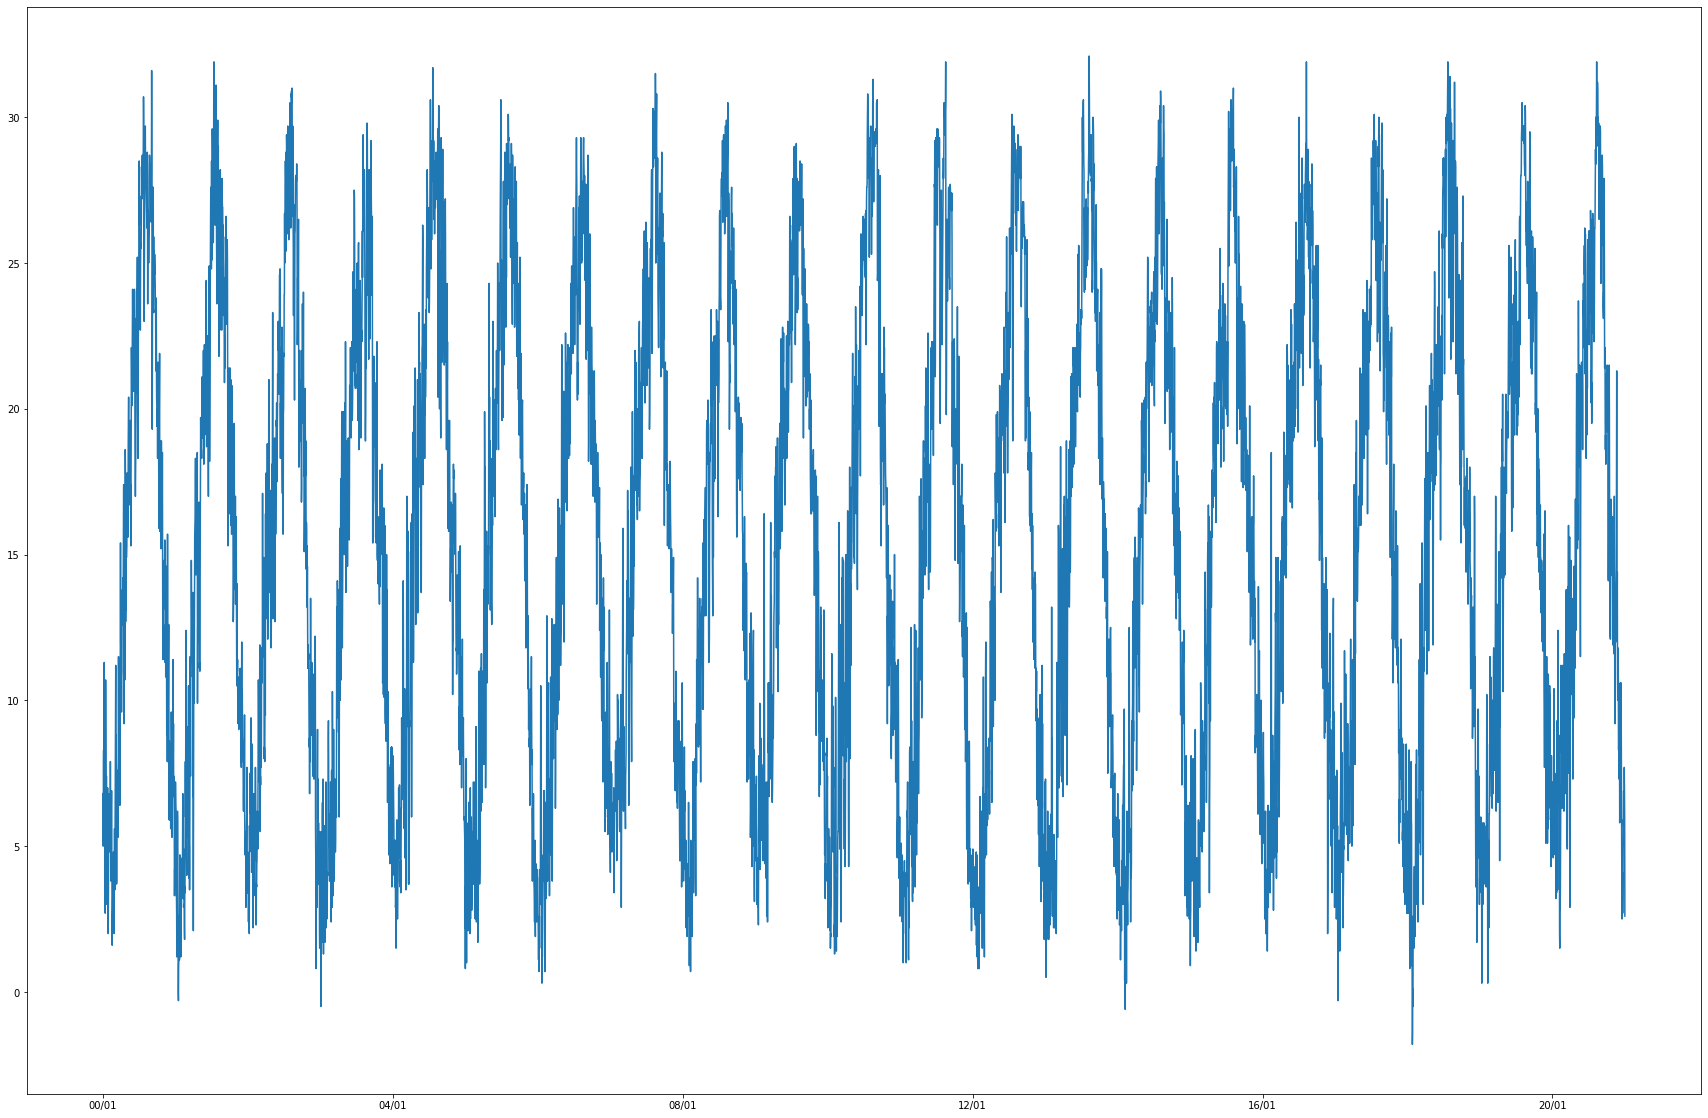

In [133]:
plt.figure(figsize=(30,20))
plt.plot(df_dti.loc["2000-01-01":"2020-12-31"])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%y/%m"))

plt.show()

In [134]:
df_dti

,1
0,
1995-01-01,5.1
1995-01-02,3.5
1995-01-03,2.7
1995-01-04,4.6
1995-01-05,8.7
...,...
2020-12-27,5.6
2020-12-28,7.7
2020-12-29,6.6


In [135]:
import torch 
torch.cuda.is_available()

False

In [40]:
import torch
import torch.nn as nn
from torch.optim import SGD
import math
import numpy as np

class Predictor(nn.Module):
    def __init__(self, inputDim, hiddenDim, outputDim):
        super(Predictor, self).__init__()

        self.rnn = nn.LSTM(input_size = inputDim,
                            hidden_size = hiddenDim,
                            batch_first = True)
        self.output_layer = nn.Linear(hiddenDim, outputDim)
    
    def forward(self, inputs, hidden0=None):
        output, (hidden, cell) = self.rnn(inputs, hidden0)
        output = self.output_layer(output[:, -1, :])

        return output

def mkDataSet(data_size, data_length=50, freq=60., noise=0.00):
    """
    params\n
    data_size : データセットサイズ\n
    data_length : 各データの時系列長\n
    freq : 周波数\n
    noise : ノイズの振幅\n
    returns\n
    train_x : トレーニングデータ（t=1,2,...,size-1の値)\n
    train_t : トレーニングデータのラベル（t=sizeの値）\n
    """
    train_x = []
    train_t = []

    for offset in range(data_size):
        train_x.append([[math.sin(2 * math.pi * (offset + i) / freq) + np.random.normal(loc=0.0, scale=noise)] for i in range(data_length)])
        train_t.append([math.sin(2 * math.pi * (offset + data_length) / freq)])

    return train_x, train_t

def mkRandomBatch(train_x, train_t, batch_size=10):
    """
    train_x, train_tを受け取ってbatch_x, batch_tを返す。
    """
    batch_x = []
    batch_t = []

    for _ in range(batch_size):
        idx = np.random.randint(0, len(train_x) - 1)
        batch_x.append(train_x[idx])
        batch_t.append(train_t[idx])
    
    return torch.tensor(batch_x), torch.tensor(batch_t)

def main():
    training_size = 10000
    test_size = 1000
    epochs_num = 1000
    hidden_size = 5
    batch_size = 100

    train_x, train_t = mkDataSet(training_size)
    print(np.array(train_x).shape)
    test_x, test_t = mkDataSet(test_size)

    model = Predictor(1, hidden_size, 1)
    criterion = nn.MSELoss()
    optimizer = SGD(model.parameters(), lr=0.01)

    for epoch in range(epochs_num):
        # training
        running_loss = 0.0
        training_accuracy = 0.0
        for i in range(int(training_size / batch_size)):
            optimizer.zero_grad()

            data, label = mkRandomBatch(train_x, train_t, batch_size)
            print(data.shape)

            output = model(data)

            loss = criterion(output, label)
            loss.backward()
            optimizer.step()

            running_loss += loss.data
            training_accuracy += np.sum(np.abs((output.data - label.data).numpy()) < 0.1)

        #test
        test_accuracy = 0.0
        for i in range(int(test_size / batch_size)):
            offset = i * batch_size
            data, label = torch.tensor(test_x[offset:offset+batch_size]), torch.tensor(test_t[offset:offset+batch_size])
            output = model(data, None)

            test_accuracy += np.sum(np.abs((output.data - label.data).numpy()) < 0.1)
        
        training_accuracy /= training_size
        test_accuracy /= test_size

        print('%d loss: %.3f, training_accuracy: %.5f, test_accuracy: %.5f' % (
            epoch + 1, running_loss, training_accuracy, test_accuracy))


if __name__ == '__main__':
    main()

(10000, 50, 1)
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size([100, 50, 1])
torch.Size

KeyboardInterrupt: 

In [ ]:
def make_data_set(data,lookback):

    X=[]
    Y=[]
    for i in range(len(data)-lookback):
        X.append([data[j] for j in range(i,i+lookback)])
        Y.append(data[i+lookback])

    
    return X,Y


In [ ]:
df3=df_dti.loc["2019-01-01":"2019-12-31",:]
data = df3.iloc[:,0].values

In [ ]:
X,Y= make_data_set(data,5)

In [ ]:
X

[[4.2, 4.3, 3.7, 4.0, 6.0],
 [4.3, 3.7, 4.0, 6.0, 4.1],
 [3.7, 4.0, 6.0, 4.1, 3.9],
 [4.0, 6.0, 4.1, 3.9, 3.4],
 [6.0, 4.1, 3.9, 3.4, 4.0],
 [4.1, 3.9, 3.4, 4.0, 0.3],
 [3.9, 3.4, 4.0, 0.3, 5.8],
 [3.4, 4.0, 0.3, 5.8, 3.9],
 [4.0, 0.3, 5.8, 3.9, 5.5],
 [0.3, 5.8, 3.9, 5.5, 4.0],
 [5.8, 3.9, 5.5, 4.0, 3.0],
 [3.9, 5.5, 4.0, 3.0, 5.3],
 [5.5, 4.0, 3.0, 5.3, 5.4],
 [4.0, 3.0, 5.3, 5.4, 4.9],
 [3.0, 5.3, 5.4, 4.9, 5.0],
 [5.3, 5.4, 4.9, 5.0, 5.8],
 [5.4, 4.9, 5.0, 5.8, 4.9],
 [4.9, 5.0, 5.8, 4.9, 3.7],
 [5.0, 5.8, 4.9, 3.7, 4.9],
 [5.8, 4.9, 3.7, 4.9, 5.7],
 [4.9, 3.7, 4.9, 5.7, 4.5],
 [3.7, 4.9, 5.7, 4.5, 4.0],
 [4.9, 5.7, 4.5, 4.0, 4.3],
 [5.7, 4.5, 4.0, 4.3, 4.5],
 [4.5, 4.0, 4.3, 4.5, 5.4],
 [4.0, 4.3, 4.5, 5.4, 3.9],
 [4.3, 4.5, 5.4, 3.9, 4.0],
 [4.5, 5.4, 3.9, 4.0, 3.6],
 [5.4, 3.9, 4.0, 3.6, 4.8],
 [3.9, 4.0, 3.6, 4.8, 6.7],
 [4.0, 3.6, 4.8, 6.7, 10.2],
 [3.6, 4.8, 6.7, 10.2, 6.0],
 [4.8, 6.7, 10.2, 6.0, 5.3],
 [6.7, 10.2, 6.0, 5.3, 8.5],
 [10.2, 6.0, 5.3, 8.5, 4.6],
 [6.0, 5.3, 8.5

In [ ]:
Y

[4.1,
 3.9,
 3.4,
 4.0,
 0.3,
 5.8,
 3.9,
 5.5,
 4.0,
 3.0,
 5.3,
 5.4,
 4.9,
 5.0,
 5.8,
 4.9,
 3.7,
 4.9,
 5.7,
 4.5,
 4.0,
 4.3,
 4.5,
 5.4,
 3.9,
 4.0,
 3.6,
 4.8,
 6.7,
 10.2,
 6.0,
 5.3,
 8.5,
 4.6,
 0.3,
 3.0,
 2.4,
 5.2,
 4.9,
 3.7,
 2.2,
 6.1,
 6.1,
 6.7,
 8.0,
 11.5,
 9.7,
 8.3,
 8.4,
 7.7,
 10.8,
 9.8,
 7.4,
 6.7,
 8.9,
 10.0,
 6.3,
 7.6,
 9.5,
 10.0,
 7.9,
 6.8,
 9.0,
 11.5,
 11.8,
 11.0,
 10.8,
 7.6,
 8.3,
 8.2,
 8.2,
 8.9,
 11.6,
 14.1,
 17.0,
 14.7,
 6.2,
 7.0,
 9.4,
 11.5,
 13.3,
 12.8,
 7.6,
 8.2,
 9.9,
 7.8,
 6.5,
 7.4,
 9.8,
 13.9,
 15.1,
 15.1,
 9.1,
 10.2,
 4.5,
 10.1,
 9.1,
 11.1,
 13.8,
 15.7,
 14.4,
 14.3,
 16.7,
 18.0,
 14.2,
 17.2,
 19.3,
 18.6,
 18.2,
 20.5,
 12.1,
 10.3,
 12.1,
 14.3,
 14.2,
 17.6,
 18.0,
 17.8,
 16.7,
 17.5,
 17.9,
 14.3,
 15.5,
 17.2,
 19.6,
 20.5,
 17.7,
 17.7,
 17.1,
 18.5,
 19.0,
 19.9,
 19.4,
 19.9,
 19.3,
 19.2,
 19.0,
 20.6,
 22.6,
 23.3,
 24.5,
 25.6,
 23.3,
 20.5,
 20.9,
 20.9,
 21.1,
 21.4,
 22.0,
 22.0,
 21.8,
 25.2,
 20.8,
 21.1

In [8]:
nikkei = pd.read_csv("nikkei_stock_average_daily_jp.csv",encoding="shift-jis")
nikkei[nikkei['データ日付'].str.contains('2018/12/')]

,データ日付,終値,始値,高値,安値
226,2018/12/03,22574.76,22629.39,22698.79,22550.29
227,2018/12/04,22036.05,22533.97,22576.62,22033.41
228,2018/12/05,21919.33,21755.17,21979.18,21708.82
229,2018/12/06,21501.62,21766.50,21805.02,21307.72
230,2018/12/07,21678.68,21643.75,21734.94,21506.45
231,2018/12/10,21219.50,21319.47,21365.78,21169.96
232,2018/12/11,21148.02,21273.04,21279.02,21062.31
233,2018/12/12,21602.75,21348.40,21631.47,21320.72
234,2018/12/13,21816.19,21755.13,21871.34,21675.66
235,2018/12/14,21374.83,21638.96,21751.31,21353.94


In [9]:
nikkei = nikkei.drop("始値",axis=1)

In [10]:
nikkei=nikkei.iloc[0:883,:]

In [11]:
nikkei = nikkei.drop(["高値","安値"],axis=1)

In [12]:
nikkei["データ日付"]=pd.to_datetime(nikkei["データ日付"])

In [13]:
nikkei2018=nikkei.iloc[:245]

In [14]:
nikkei2018.tail()

,データ日付,終値
240,2018-12-21,20166.19
241,2018-12-25,19155.74
242,2018-12-26,19327.06
243,2018-12-27,20077.62
244,2018-12-28,20014.77


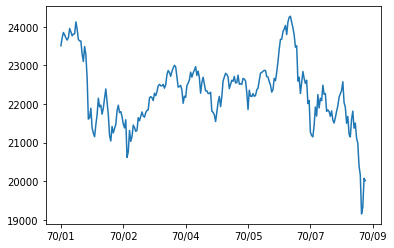

In [15]:
plt.plot(nikkei2018.iloc[:,1])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%y/%m"))

In [16]:
nikkei2018_dti = nikkei2018.set_index('データ日付')

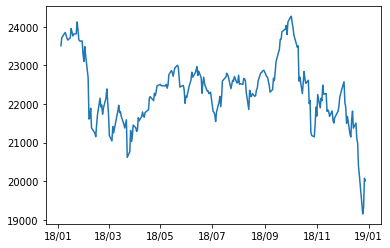

In [17]:
plt.plot(nikkei2018_dti)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%y/%m"))

In [35]:
import useful_functions as uf
import torch
import torch.nn as nn
from torch.optim import SGD
import math
import numpy as np
import datetime as dt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import itertools

In [19]:
data = nikkei2018["終値"].values.reshape(-1,1)
data

array([[23506.33],
       [23714.53],
       [23849.99],
       [23788.2 ],
       [23710.43],
       [23653.82],
       [23714.88],
       [23951.81],
       [23868.34],
       [23763.37],
       [23808.06],
       [23816.33],
       [24124.15],
       [23940.78],
       [23669.49],
       [23631.88],
       [23629.34],
       [23291.97],
       [23098.29],
       [23486.11],
       [23274.53],
       [22682.08],
       [21610.24],
       [21645.37],
       [21890.86],
       [21382.62],
       [21244.68],
       [21154.17],
       [21464.98],
       [21720.25],
       [22149.21],
       [21925.1 ],
       [21970.81],
       [21736.44],
       [21892.78],
       [22153.63],
       [22389.86],
       [22068.24],
       [21724.47],
       [21181.64],
       [21042.09],
       [21417.76],
       [21252.72],
       [21368.07],
       [21469.2 ],
       [21824.03],
       [21968.1 ],
       [21777.29],
       [21803.95],
       [21676.51],
       [21480.9 ],
       [21380.97],
       [2159

In [20]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [21]:
X,Y=uf.make_data_set(data_scaled,30)

In [22]:
nikkei2021 = nikkei[nikkei['データ日付'] > dt.datetime(2021,1,1)]
test_data = nikkei2021["終値"].values.reshape(-1,1)
test_data_scaled = scaler.transform(test_data)

In [23]:
test_X,test_Y = uf.make_data_set(test_data,30)

In [24]:
X

[[[0.8505751845595597],
  [0.8912799518268271],
  [0.9177634665915919],
  [0.905683026776777],
  [0.8904783689939944],
  [0.8794106606606604],
  [0.8913483796296298],
  [0.9376700919669672],
  [0.9213510385385391],
  [0.9008285629379378],
  [0.9095658158158164],
  [0.9111826670420422],
  [0.9713639420670672],
  [0.9355136386386382],
  [0.8824742711461466],
  [0.875121214964965],
  [0.8746246246246248],
  [0.8086660879629637],
  [0.7708000969719722],
  [0.8466220126376376],
  [0.805256428303303],
  [0.6894277089589593],
  [0.4798744056556563],
  [0.48674260197697716],
  [0.5347378628628627],
  [0.43537287287287274],
  [0.408404498248248],
  [0.3907090684434431],
  [0.45147491241241244],
  [0.5013822416166169]],
 [[0.8912799518268271],
  [0.9177634665915919],
  [0.905683026776777],
  [0.8904783689939944],
  [0.8794106606606604],
  [0.8913483796296298],
  [0.9376700919669672],
  [0.9213510385385391],
  [0.9008285629379378],
  [0.9095658158158164],
  [0.9111826670420422],
  [0.971363942067

1 loss: 4.456, test_accuracy: 3464626.03125
2 loss: 1.696, test_accuracy: 3464605.96875
3 loss: 0.750, test_accuracy: 3464587.90625
4 loss: 0.553, test_accuracy: 3464581.59375
5 loss: 0.478, test_accuracy: 3464577.25000
6 loss: 0.420, test_accuracy: 3464576.03125
7 loss: 0.416, test_accuracy: 3464574.87500
8 loss: 0.400, test_accuracy: 3464573.75000
9 loss: 0.367, test_accuracy: 3464572.62500
10 loss: 0.384, test_accuracy: 3464571.15625
11 loss: 0.321, test_accuracy: 3464570.03125
12 loss: 0.437, test_accuracy: 3464569.28125
13 loss: 0.380, test_accuracy: 3464568.46875
14 loss: 0.365, test_accuracy: 3464565.84375
15 loss: 0.355, test_accuracy: 3464565.12500
16 loss: 0.338, test_accuracy: 3464564.15625
17 loss: 0.358, test_accuracy: 3464563.96875
18 loss: 0.463, test_accuracy: 3464562.12500
19 loss: 0.506, test_accuracy: 3464561.15625
20 loss: 0.391, test_accuracy: 3464560.81250
21 loss: 0.380, test_accuracy: 3464560.15625
22 loss: 0.337, test_accuracy: 3464557.09375
23 loss: 0.468, tes

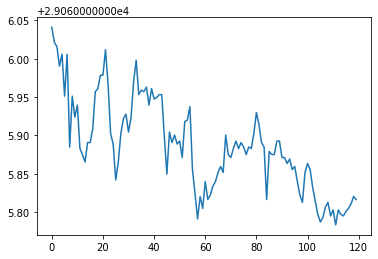

In [40]:
model = uf.LSTMNet(1,500,1)
criterion =nn.MSELoss()
optimizer = SGD(model.parameters(),lr=0.01)

training_size = len(X)
test_size = len(test_X)
epochs_num = 100
hidden_size = 5
batch_size = 10

for epoch in range(epochs_num):
        # training
        running_loss = 0.0
        training_accuracy = 0.0
        for i in range(int(training_size / batch_size)):
            optimizer.zero_grad()

            data, label = uf.makeRandomBatch(X, Y, batch_size)

            output = model(data)

            loss = criterion(output, label)
            loss.backward()
            optimizer.step()

            running_loss += loss.data

        #test
        test_loss = 0.0
        outputs=[]
        for i in range(int(test_size / batch_size)):
            offset = i * batch_size
            data, label = torch.tensor(test_X[offset:offset+batch_size]).float(), torch.tensor(test_Y[offset:offset+batch_size]).float()
            output = model(data, None)
            output2 = output.to('cpu').detach().numpy().copy()

            inversed = scaler.inverse_transform(output2).ravel().tolist()
            
            outputs.append(inversed)

            test_loss += np.sum(np.abs((output.data - label.data).numpy()))
        
        training_accuracy /= training_size

        predicts = list(itertools.chain.from_iterable(outputs))

        print('%d loss: %.3f, test_accuracy: %.5f' % (
            epoch + 1, running_loss, test_loss))

plt.plot(predicts)

In [44]:
nikkei2018.describe()

,終値
count,245.000000
mean,22310.726816
std,857.360774
min,19155.740000
25%,21785.540000
50%,22307.060000
75%,22712.750000
max,24270.620000


In [45]:
nikkei2021.describe()

,終値
count,154.000000
mean,28771.549416
std,771.381386
min,27055.940000
25%,28172.610000
50%,28813.485000
75%,29351.207500
max,30467.750000
